<a href="https://colab.research.google.com/github/Snafkin547/Quantum-ML/blob/main/QML_Ch7_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install numpy scipy matplotlib ipython pandas sympy nose seaborn
!pip install scikit-learn
!pip install pylatexenc ipywidgets qutip
!pip install kaggle

from google.colab import drive
import os

#Google Drive mounting to Google Colab
drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/QML/Kaggle"
#Change the working directory
%cd /content/gdrive/My Drive/QML/Kaggle/

#Check if the directory was properly changed
%pwd

In [45]:
import pandas as pd

train=pd.read_csv('./train.csv')

# total length
cnt_all=len(train)

#list of all survivors
survivors=train[train['Survived']==1]

cnt_survivors=len(survivors)

# calculate the priority probability 
prob_survival=len(survivors)/cnt_all

print("The prior probability to survive is: ", round(prob_survival,2))


The prior probability to survive is:  0.38


In [46]:
# modifier = class
def get_modifier_pclass(pclass):
  cnt_surv_pclass=len(survivors[survivors['Pclass']==pclass])

  # Probability of the prior(B|A)
  p_cl_surv=cnt_surv_pclass/cnt_survivors

  # Probability of the evidence(A)
  p_cl=len(train[train['Pclass']==pclass])/cnt_all

  return p_cl_surv/p_cl         
           
# modifier = sex
def get_modifier_sex(sex):
  cnt_surv_sex=len(survivors[survivors['Sex']==sex])

  # Probability of the prior(B|A)
  p_sex_surv=cnt_surv_sex/cnt_survivors

  # Probability of the evidence(A)
  p_sex=len(train[train['Sex']==sex])/cnt_all

  return p_sex_surv/p_sex

In [47]:
def pre_process(passenger):
  return [
          get_modifier_pclass(passenger["Pclass"]),
          get_modifier_sex(passenger["Sex"]),
  ]

In [48]:
#Modifier example

# a female passenger with 1st class ticket
print (pre_process(train.iloc[52]))
# a male passenger with 3rd class ticket
print (pre_process(train.iloc[26]))

[1.6403508771929822, 1.9332048273550118]
[0.6314181584306999, 0.49215543190732464]


### PQC


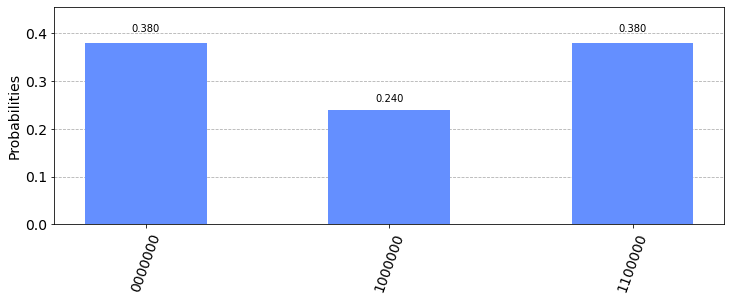

In [49]:
from functools import reduce
from qiskit import QuantumCircuit, Aer, execute, ClassicalRegister, QuantumRegister
from math import asin, sqrt, ceil
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def prob_to_angle(prob):
  return 2*asin(sqrt(prob))

def pqc(backend, prior, modifiers, shots=1, hist=False, measure=False):
  qr=QuantumRegister(7)
  cr=ClassicalRegister(1)
  qc=QuantumCircuit(qr, cr) if measure else QuantumCircuit(qr)

### INSERT QC as necessary

  # We set our target qubit to use
  target=6

  # Apply prior to qubit to the target qubit
  qc.ry(prob_to_angle(prior), target)

  # auxiliary qubit to hold the whole prior
  aux_full=5

  # Work with the remainder
  qc.x(target)

  # Apply prior to full aux qubit
  qc.cry(prob_to_angle(prior/(1-prior)), target, aux_full)

  ##  Measure he qubit if True
  if measure:
    qc.measure(qr[0], cr[0])

  results=execute(qc, backend, shots=shots).result().get_counts()
  return plot_histogram(results, figsize=(12,4)) if hist else results
backend=Aer.get_backend('statevector_simulator')
pqc(backend, prior=0.38, modifiers=1, shots=1, hist=True, measure=False)

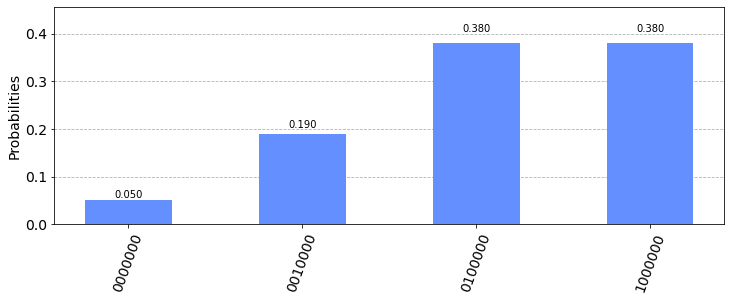

In [50]:
from functools import reduce
from qiskit import QuantumCircuit, Aer, execute, ClassicalRegister, QuantumRegister
from math import asin, sqrt, ceil
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def prob_to_angle(prob):
  return 2*asin(sqrt(prob))

def pqc(backend, prior, modifiers, shots=1, hist=False, measure=False):
  qr=QuantumRegister(7)
  cr=ClassicalRegister(1)
  qc=QuantumCircuit(qr, cr) if measure else QuantumCircuit(qr)

### INSERT QC as necessary

  # We set our target qubit to use
  target=6

  # Apply prior to qubit to the target qubit
  qc.ry(prob_to_angle(prior), target)

  # auxiliary qubit to hold the whole prior
  aux_full=5

  # Work with the remainder
  qc.x(target)

  # Apply prior to full aux qubit
  qc.cry(prob_to_angle(prior/(1-prior)), target, aux_full)


## Added Lines
  # second auxiliary qubit to hold the whole prior
  aux_half=4

  # Work with the remainder (Step CX)
  qc.cx(aux_full, target)

  # Apply 0.5 prior to half aux qubit to make 100000 to be 0.50 and leave the remainder in 1010000
  qc.cry(prob_to_angle(0.5*prior/(1-2*prior)), target, aux_half)

  # Reverse Step CX
  qc.x(target)
  qc.cx(aux_full, target)

  ##  Measure he qubit if True
  if measure:
    qc.measure(qr[0], cr[0])

  results=execute(qc, backend, shots=shots).result().get_counts()
  return plot_histogram(results, figsize=(12,4)) if hist else results
backend=Aer.get_backend('statevector_simulator')
pqc(backend, prior=0.38, modifiers=1, shots=1, hist=True, measure=False)

Limit max modifiers as prior+aux_half=1.5prior

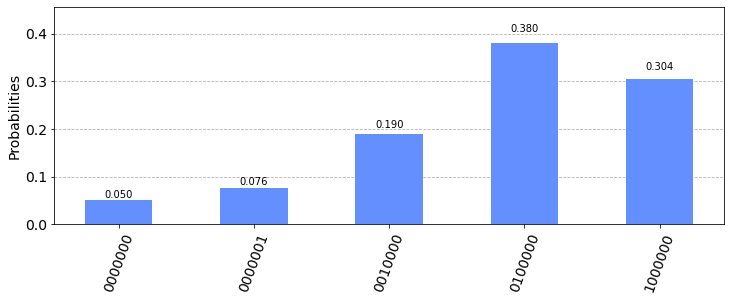

In [51]:
from functools import reduce
from qiskit import QuantumCircuit, Aer, execute, ClassicalRegister, QuantumRegister
from math import asin, sqrt, ceil
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def prob_to_angle(prob):
  return 2*asin(sqrt(prob))

def pqc(backend, prior, modifiers, shots=1, hist=False, measure=False):
  qr=QuantumRegister(7)
  cr=ClassicalRegister(1)
  qc=QuantumCircuit(qr, cr) if measure else QuantumCircuit(qr)

### INSERT QC as necessary

  # We set our target qubit to use
  target=6

  # Apply prior to qubit to the target qubit
  qc.ry(prob_to_angle(prior), target)

  # auxiliary qubit to hold the whole prior
  aux_full=5

  # Work with the remainder
  qc.x(target)

  # Apply prior to full aux qubit
  qc.cry(prob_to_angle(prior/(1-prior)), target, aux_full)


## Added Lines
  # second auxiliary qubit to hold the whole prior
  aux_half=4

  # Work with the remainder (Step CX)
  qc.cx(aux_full, target)

  # Apply 0.5 prior to half aux qubit to make 100000 to be 0.50 and leave the remainder in 1010000
  qc.cry(prob_to_angle(0.5*prior/(1-2*prior)), target, aux_half)

  # Reverse Step CX
  qc.x(target)
  qc.cx(aux_full, target)
  
  # sort the modifiers
  sorted_modifiers=sorted(modifiers)

  for step in range(0, len(modifiers)):
    if sorted_modifiers[step]>1:
      # Just implement as usual
      pass

    else: 
      # Apply modifiers to the target qubit
      qc.cry(prob_to_angle(1-sorted_modifiers[step]), target, step*2)
      # Reverse above
      qc.cx(step*2,target)

  ##  Measure he qubit if True
  if measure:
    qc.measure(qr[0], cr[0])

  results=execute(qc, backend, shots=shots).result().get_counts()
  return plot_histogram(results, figsize=(12,4)) if hist else results

backend=Aer.get_backend('statevector_simulator')
pqc(backend, prior=0.38, modifiers=[1.93, 1.64, 0.8], shots=1, hist=True, measure=False)

#### Add if modifier > 1

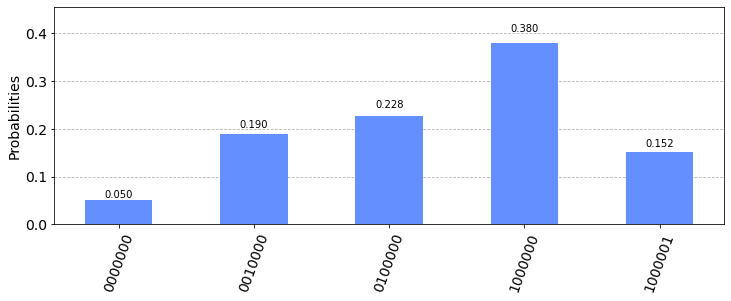

In [52]:
from functools import reduce
from qiskit import QuantumCircuit, Aer, execute, ClassicalRegister, QuantumRegister
from math import asin, sqrt, ceil
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def prob_to_angle(prob):
  return 2*asin(sqrt(prob))

def pqc(backend, prior, modifiers, shots=1, hist=False, measure=False):
  qr=QuantumRegister(7)
  cr=ClassicalRegister(1)
  qc=QuantumCircuit(qr, cr) if measure else QuantumCircuit(qr)

### INSERT QC as necessary

  # We set our target qubit to use
  target=6

  # Apply prior to qubit to the target qubit
  qc.ry(prob_to_angle(prior), target)

  # auxiliary qubit to hold the whole prior
  aux_full=5

  # Work with the remainder
  qc.x(target)

  # Apply prior to full aux qubit
  qc.cry(prob_to_angle(prior/(1-prior)), target, aux_full)


## Added Lines
  # second auxiliary qubit to hold the whole prior
  aux_half=4

  # Work with the remainder (Step CX)
  qc.cx(aux_full, target)

  # Apply 0.5 prior to half aux qubit to make 100000 to be 0.50 and leave the remainder in 1010000
  qc.cry(prob_to_angle(0.5*prior/(1-2*prior)), target, aux_half)

  # Reverse Step CX
  qc.x(target)
  qc.cx(aux_full, target)
  
  # sort the modifiers
  sorted_modifiers=sorted(modifiers)

  for step in range(0, len(modifiers)):
    if sorted_modifiers[step]>1:
      # Implement modeifiers increment to target
      qc.cry(prob_to_angle(min(1, sorted_modifiers[step]-1)), aux_full, target)
      ## separates qubit where target and aux_full are both 1
      qc.ccx(target, aux_full, 0)
      ## separates qubit where target and 0 are both 1
      qc.ccx(target, 0, aux_full)

    else: 
      # Apply modifiers increment to the target qubit
      qc.cry(prob_to_angle(1-sorted_modifiers[step]), target, step*2)
      # Reverse above
      qc.cx(step*2,target)

  ##  Measure he qubit if True
  if measure:
    qc.measure(qr[0], cr[0])

  results=execute(qc, backend, shots=shots).result().get_counts()
  return plot_histogram(results, figsize=(12,4)) if hist else results

backend=Aer.get_backend('statevector_simulator')
pqc(backend, prior=0.38, modifiers=[1.4], shots=1, hist=True, measure=False) 

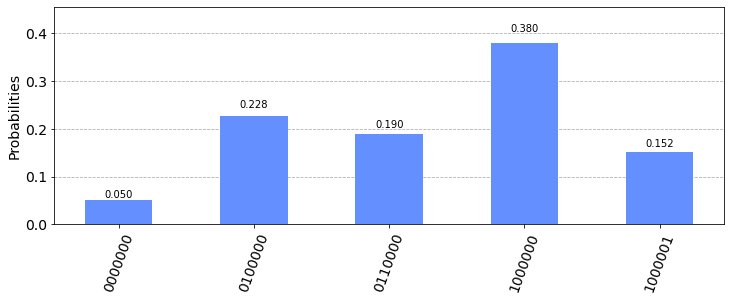

In [59]:
from functools import reduce
from qiskit import QuantumCircuit, Aer, execute, ClassicalRegister, QuantumRegister
from math import asin, sqrt, ceil
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def prob_to_angle(prob):
  return 2*asin(sqrt(prob))

def pqc(backend, prior, modifiers, shots=1, hist=False, measure=False):
  qr=QuantumRegister(7)
  cr=ClassicalRegister(1)
  qc=QuantumCircuit(qr, cr) if measure else QuantumCircuit(qr)

### INSERT QC as necessary

  # We set our target qubit to use
  target=6

  # Apply prior to qubit to the target qubit
  qc.ry(prob_to_angle(prior), target)

  # auxiliary qubit to hold the whole prior
  aux_full=5

  # Work with the remainder
  qc.x(target)

  # Apply prior to full aux qubit
  qc.cry(prob_to_angle(prior/(1-prior)), target, aux_full)

  # second auxiliary qubit to hold the whole prior
  aux_half=4

  # Work with the remainder (Step CX)
  qc.cx(aux_full, target)

  # Apply 0.5 prior to half aux qubit to make 100000 to be 0.50 and leave the remainder in 1010000
  qc.cry(prob_to_angle(0.5*prior/(1-2*prior)), target, aux_half)

  # Reverse Step CX
  qc.x(target)
  qc.cx(aux_full, target)
  
  # sort the modifiers
  sorted_modifiers=sorted(modifiers)

  for step in range(0, len(modifiers)):
    if sorted_modifiers[step]>1:
      # Implement modeifiers increment to target
      qc.cry(prob_to_angle(min(1, sorted_modifiers[step]-1)), aux_full, target)
      ## separates qubit where target and aux_full are both 1
      qc.ccx(target, aux_full, 0)
      ## separates qubit where target and 0 are both 1
      qc.ccx(target, 0, aux_full)

    else: 
      # Apply modifiers increment to the target qubit
      qc.cry(prob_to_angle(1-sorted_modifiers[step]), target, step*2)
      # Reverse above
      qc.cx(step*2,target)

    if step==0:
      qc.cry(prob_to_angle(min(1, (sorted_modifiers[step]-1)*2*2)), aux_half, aux_full) 

  ##  Measure he qubit if True
  if measure:
    qc.measure(qr[0], cr[0])

  results=execute(qc, backend, shots=shots).result().get_counts()
  return plot_histogram(results, figsize=(12,4)) if hist else results

backend=Aer.get_backend('statevector_simulator')
pqc(backend, prior=0.38, modifiers=[1.4], shots=1, hist=True, measure=False) 

#### PQC Final code


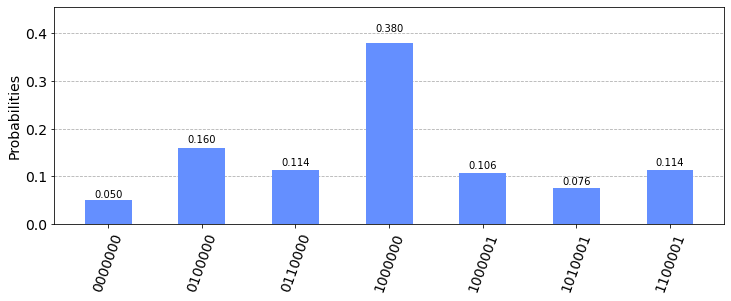

In [70]:
from functools import reduce
from qiskit import QuantumCircuit, Aer, execute, ClassicalRegister, QuantumRegister
from math import asin, sqrt, ceil
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def prob_to_angle(prob):
  return 2*asin(sqrt(prob))

def pqc(backend, prior, modifiers, shots=1, hist=False, measure=False):
  qr=QuantumRegister(7)
  cr=ClassicalRegister(1)
  qc=QuantumCircuit(qr, cr) if measure else QuantumCircuit(qr)

### INSERT QC as necessary

  # Qubit positions
  trunks=3
  aux=trunks+1
  aux_half=trunks+1
  aux_full=trunks+2
  target=trunks+3

  # Apply prior to qubit to the target qubit
  qc.ry(prob_to_angle(prior), target)

  # Work with the remainder
  qc.x(target)

  # Apply prior to full aux qubit
  qc.cry(prob_to_angle(prior/(1-prior)), target, aux_full)

  # Work with the remainder (Step CX)
  qc.cx(aux_full, target)

  # Apply 0.5 prior to half aux qubit to make 100000 to be 0.50 and leave the remainder in 1010000
  qc.cry(prob_to_angle(0.5*prior/(1-(2*prior))), target, aux_half)

  # Reverse Step CX
  qc.x(target)
  qc.cx(aux_full, target)
  
  # sort the modifiers
  sorted_modifiers=sorted(modifiers)

  for step in range(0, len(modifiers)):
    if sorted_modifiers[step]>1:
      # Implement modeifiers increment to target
      qc.cry(prob_to_angle(min(1, sorted_modifiers[step]-1)), aux_full, target)
      ## separates qubit where target and aux_full are both 1
      qc.ccx(target, aux_full, 0)
      ## separates qubit where target and 0 are both 1
      qc.ccx(target, 0, aux_full)

      if step==0:
        qc.cry(prob_to_angle(min(1,(sorted_modifiers[step]-1)*2*2)),aux_half, aux_full) 

    else: 
      # Apply modifiers increment to the target qubit
      qc.cry(prob_to_angle(1-sorted_modifiers[step]), target, step*2)
      # Reverse above
      qc.cx(step*2,target)

      if step==0:
        qc.cry(prob_to_angle(1-sorted_modifiers[step]), aux_half, step*2+1) 
        # unentangle the full auxiliary from trunk
        qc.cx(step*2+1, aux_full)

  ##  Measure he qubit if True
  if measure:
    qc.measure(qr[target], cr[0])

  results=execute(qc, backend, shots=shots).result().get_counts()
  return plot_histogram(results, figsize=(12,4)) if hist else results

backend=Aer.get_backend('statevector_simulator')
pqc(backend, prior=0.38, modifiers=[1.4,1.3], shots=1, hist=True, measure=False) 

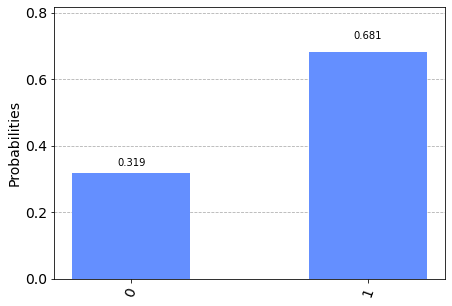

In [77]:
backend=Aer.get_backend('qasm_simulator')
plot_histogram(pqc(backend, prior=0.38, modifiers=[1.4,1.3], shots=1000, hist=False, measure=True))

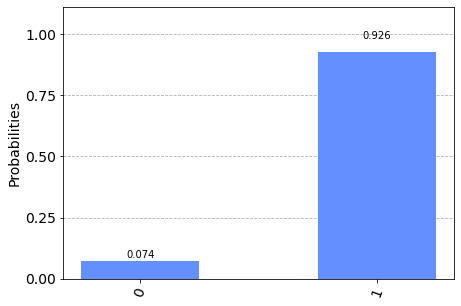

In [79]:
backend=Aer.get_backend('qasm_simulator')
plot_histogram(pqc(backend, prior=0.38, modifiers=[1.6403508771929822, 1.9332048273550118], shots=1000, hist=False, measure=True))

### Post Processing - Reporting

In [82]:
def post_process(counts):
  return int(list(map(lambda item: item[0], counts.items()))[0])

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


#Ratio of True Negatives amongst all actual negatives
def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

## Negative Predictive Value
def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

def classifier_report(name, run, classify, input, labels):
  cr_predictions=run(classify, input)
  cr_cm=confusion_matrix(labels, cr_predictions)
  
  cr_precision=precision_score(labels, cr_predictions)
  cr_recall=recall_score(labels, cr_predictions)
  cr_specificity=specificity(cr_cm)
  cr_npv=npv(cr_cm)
  cr_level=0.25*(cr_precision+cr_recall+cr_specificity+cr_npv)

  print('The precision score of the {} classifier is {:.2f}'.format(name, cr_precision))
  print('The recall score of the {} classifier is {:.2f}'.format(name, cr_recall))
  print('The specificity score of the {} classifier is {:.2f}'.format(name, cr_specificity))
  print('The npv score of the {} classifier is {:.2f}'.format(name, cr_npv))
  print('The information level is: {:.2f}'.format(cr_level))

In [91]:
# redefine the run−function
def run(f_classify, data):
 return [f_classify(data.iloc[i]) for i in range(0,len(data))]

# specify a reusable backend
backend = Aer.get_backend('qasm_simulator')

# evaluate the Quantum Naive Bayes classifier
classifier_report("QuantumNaiveBayes", run,
                  lambda passenger: post_process(pqc(backend, prob_survival, 
                  pre_process(passenger), measure=True, hist=False)),
                  train, train['Survived'])

The precision score of the QuantumNaiveBayes classifier is 0.64
The recall score of the QuantumNaiveBayes classifier is 0.60
The specificity score of the QuantumNaiveBayes classifier is 0.79
The npv score of the QuantumNaiveBayes classifier is 0.76
The information level is: 0.70
